# This notebook holds all the plots used in the manuscript 

# Setup

In [11]:
%load_ext autoreload
%autoreload 2

In [12]:
import sys
import json 
import pandas as pd 
import numpy as np 
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

# Stacked corner plot, high SNR

Extracting data from file:  ../data/clean/eg_canonical_earth_1e-12_1250_result.json
The evidence is: -556073.4850638453
The number of samples is: 4198
Variable/Injection/Median
omega_gw 500.0 500.00508203030626
phi0_gw 0.2 0.19646443051558343
psi_gw 2.5 2.596607146558471
iota_gw 1.0 0.6457088703016223
delta_gw 1.0 1.0022344226062054
alpha_gw 1.0 1.0397245146041207
h 1.0 0.9921304539038478
-------------------------------
Extracting data from file:  ../data/clean/eg_canonical_pulsar_1e-12_1250_result.json
The evidence is: 584052.1127790113
The number of samples is: 11048
Variable/Injection/Median
omega_gw 500.0 500.0073348934619
phi0_gw 0.2 0.20166576056186356
psi_gw 2.5 2.500595829395034
iota_gw 1.0 0.945401270854238
delta_gw 1.0 1.0002151069324872
alpha_gw 1.0 1.000559381307669
h 1.0 0.9631268560690665
-------------------------------


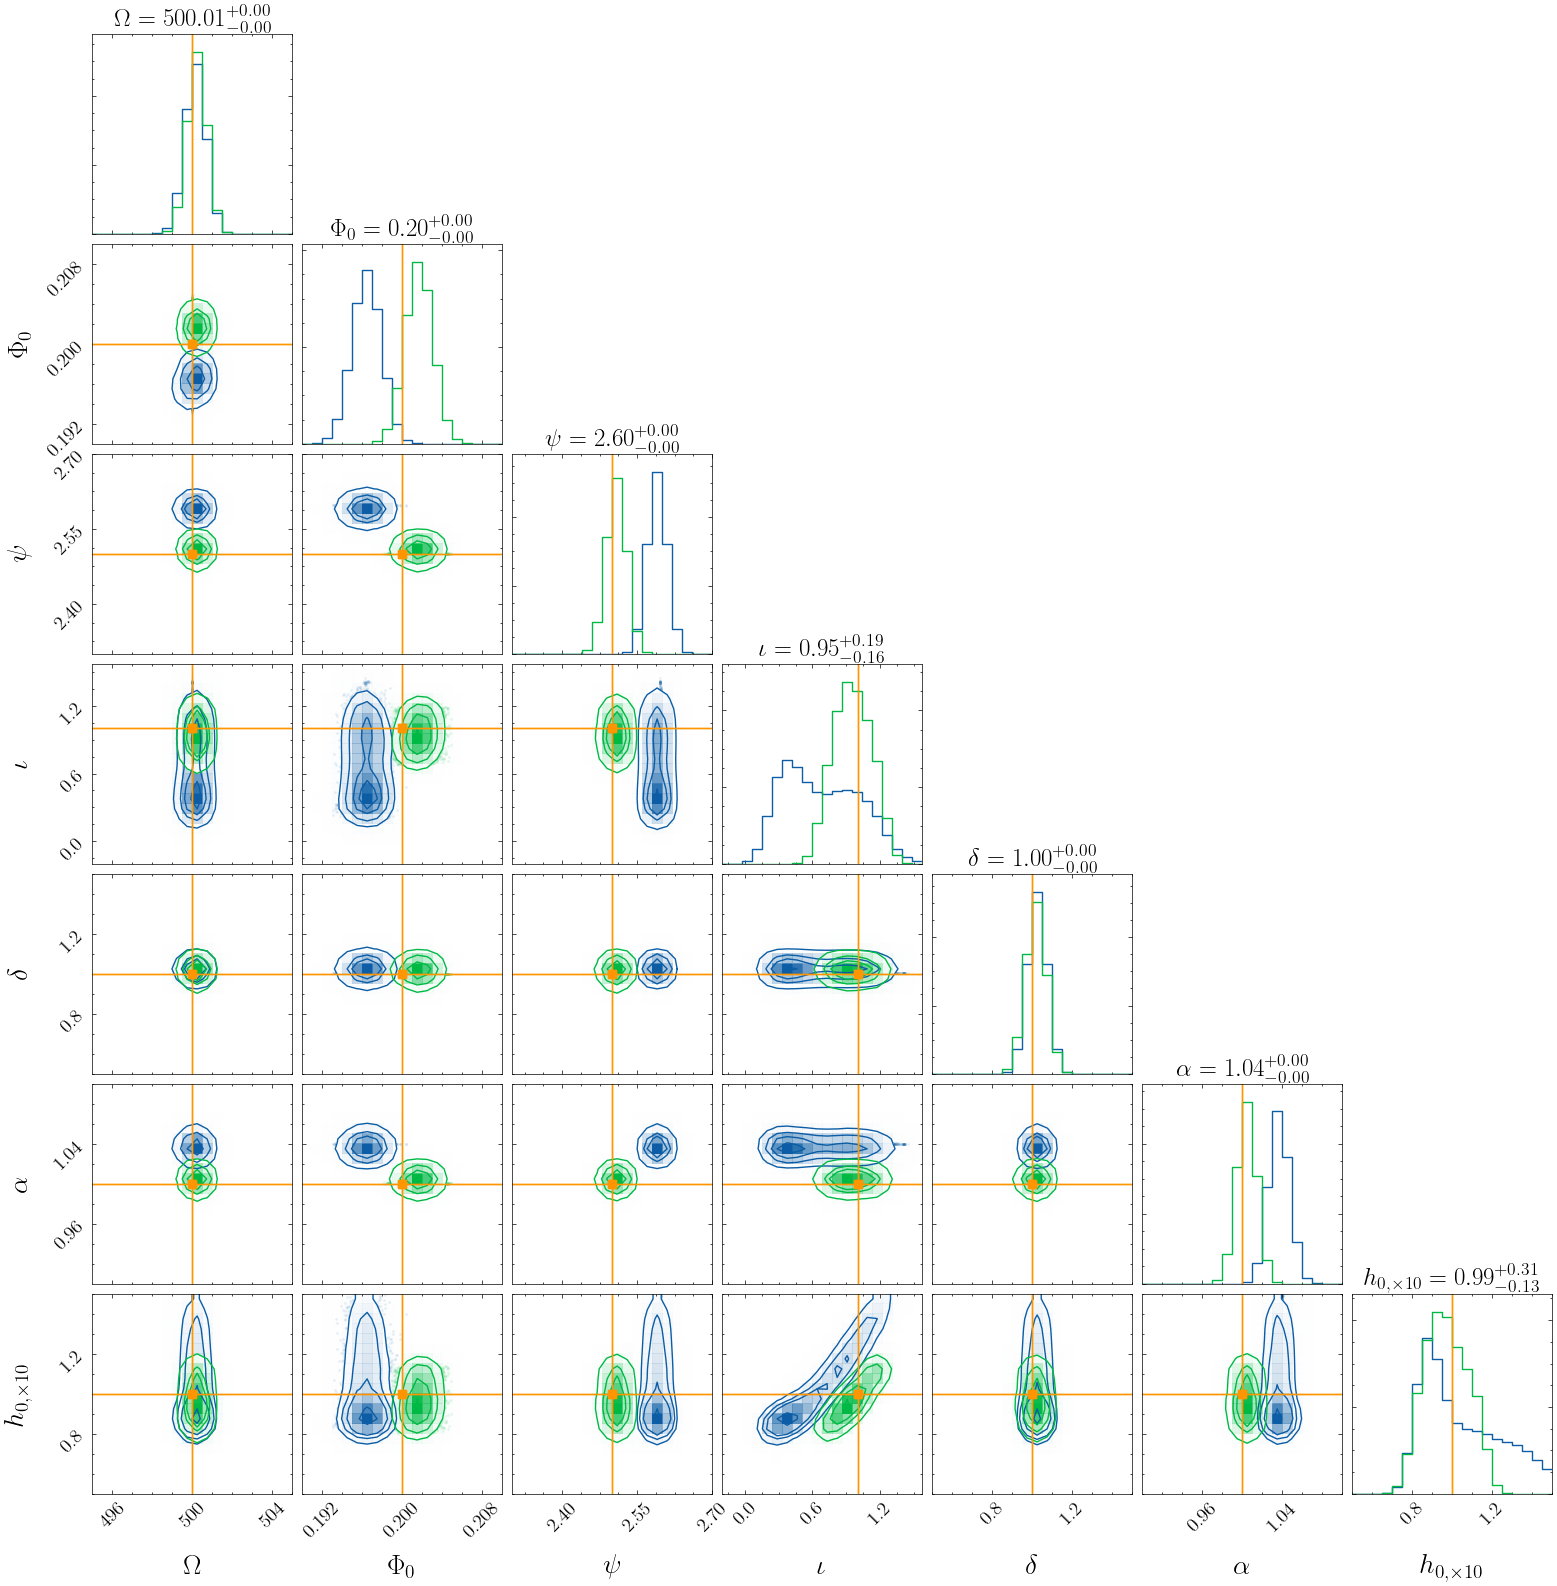

In [13]:

import glob 
from plotting import stacked_corner


#default values of GW parameters
ranges=[(4.95e-7,5.05e-7),(-0.2,1.0),(2.0,3.0),(-0.2,np.pi/2),(0.5,1.5),(0.5,1.5),(0.5e-12,1.5e-12)]
ranges=[(4.95e-7,5.05e-7),(0.19,0.21),(2.30,2.70),(-0.2,np.pi/2),(0.5,1.5),(0.90,1.10),(0.5e-12,1.5e-12)]

#ranges = None
injection_parameters = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-12]
labels = [r'$\Omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'$h_{0, \times 10}$']
variables_to_plot = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]
axes_scales = None
#ranges = None
#list_of_files = glob.glob('../data/clean/rsync_folder/*.json')

list_of_files = ['../data/clean/eg_canonical_earth_1e-12_1250_result.json','../data/clean/eg_canonical_pulsar_1e-12_1250_result.json']

number_of_files_to_plot = len(list_of_files)
#Corner plot of GW parameters
fig = stacked_corner(list_of_files,
                   number_of_files_to_plot,
                   variables_to_plot,
                   labels,
                   injection_parameters,
                   ranges,
                   axes_scales,
                   scalings = [1e9,1e12], #the scalings for omega and h
                   savefig='corner_highSNR_compare',
                   smooth=True,smooth1d=True)







# Corner plot for $\chi$, high SNR 

chi vals are =  [2.20508423 3.73837182 4.64342782 3.84454169 2.03147765 2.1615264
 2.7393055  0.29304713 0.52094514 2.6468707  0.75625183 2.69753421
 4.72535501 1.80480547 1.22838701 1.52531055 0.95286369 5.88509644
 3.21021583 0.04719118 5.83980336 2.18004167 3.37310913 4.83324786
 5.11353816 2.16383243 4.41393604 2.9784791  2.82463386 4.82152681
 6.10798125 5.59964568 1.81245195 4.24446491 5.69068483 5.94022957
 4.96810897 3.3210893  5.35316912 4.61872321 2.78637006 0.43819632
 3.62569269 3.79912049 5.5055721  2.39926347 0.43862898]
Extracting data from file:  ../data/clean/eg_canonical_pulsar_1e-12_1250_result.json
The evidence is: 584052.1127790113
The number of samples is: 11048
Variable/Injection/Median
chi0 2.2050842339981926 2.202273104118013
chi1 3.7383718155701757 3.743655616890127
chi2 4.64342781970177 4.58299637581127
chi3 3.8445416942334845 3.839056194659215
chi4 2.031477654506901 2.0318005884265053
-------------------------------


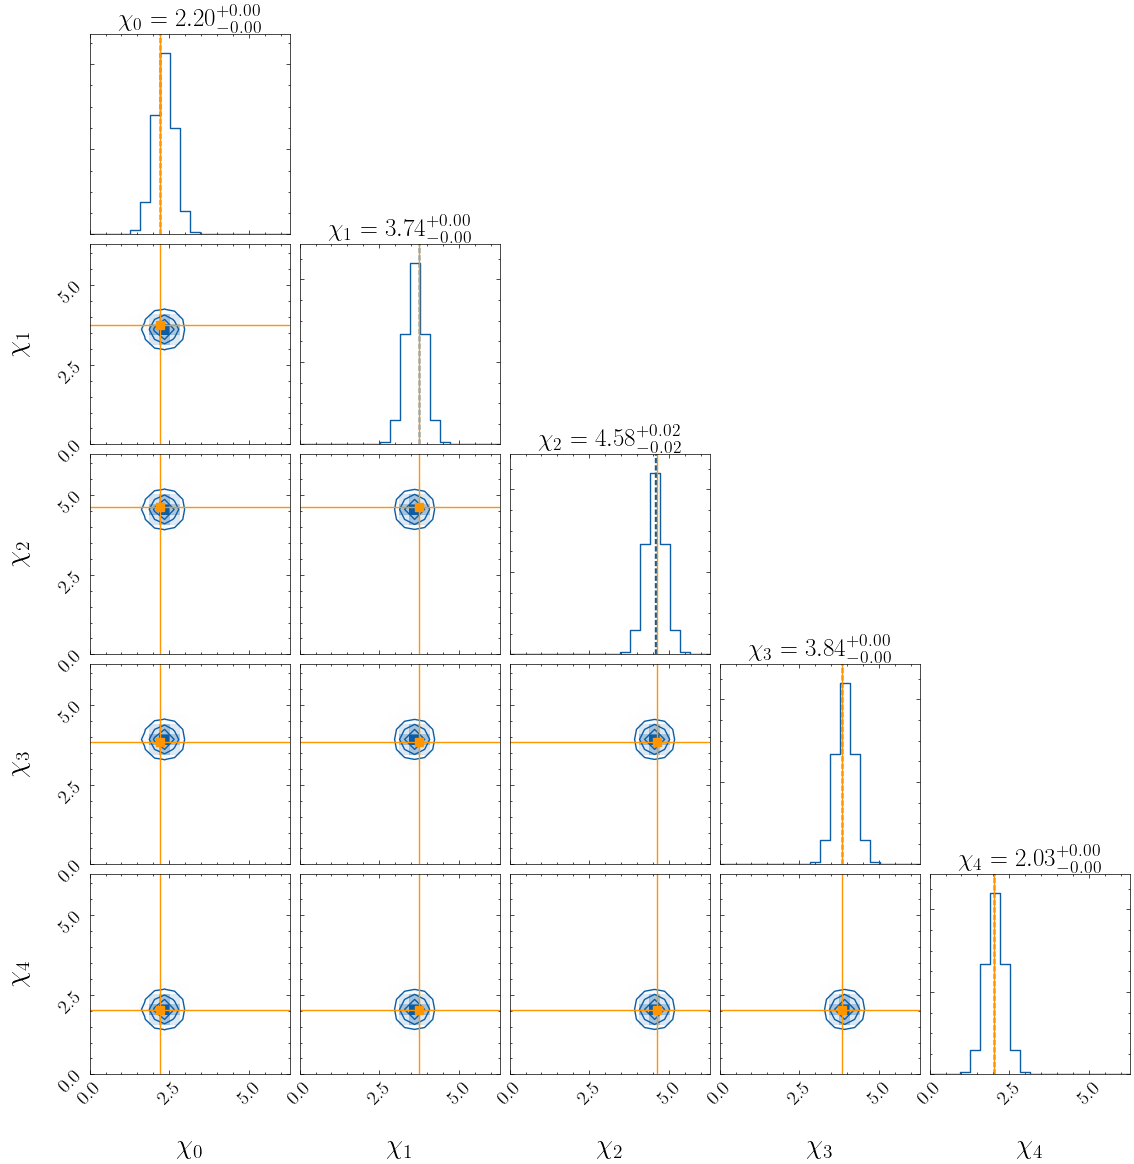

In [13]:
from plotting import plot_custom_corner


#default values of GW parameters
ranges=None


num_chi = 5
variables_to_plot = [f'chi{i}' for i in range(num_chi)]
labels  = [rf'$\chi_{i}$' for i in range(num_chi)]



#Calculate what the injections would have been


from system_parameters import SystemParameters
from pulsars import Pulsars
seed = 1250  
measurement_model = 'pulsar'
h=1e-12

P   = SystemParameters(h=h,σp=None,σm=1e-11,use_psr_terms_in_data=True,measurement_model=measurement_model,seed=seed) # define the system parameters as a dict. Todo: make this a class
PTA = Pulsars(P)                                       # setup the PTA
chi = PTA.chi



injection_parameters = [chi[i] for i in range(num_chi)] 
axes_scales = None
ranges = [(0,2*np.pi) for i in range(num_chi)]
path = '../data/clean/eg_canonical_pulsar_1e-12_1250_result.json'

#Corner plot of GW parameters
plot_custom_corner(path,
                   variables_to_plot,
                   labels,
                   injection_parameters,
                   ranges,
                   axes_scales,
                   savefig='corner_highSNR_chi',
                   smooth=True,smooth1d=True)



# Stacked corner plot, low SNR 

Extracting data from file:  ../data/clean/eg_canonical_earth_5e-15_1251_result.json
The evidence is: 585740.2300207041
The number of samples is: 5259
Variable/Injection/Median
omega_gw 500.0 502.40358428810686
phi0_gw 0.2 0.4724753807455998
psi_gw 2.5 2.5132530613123762
iota_gw 1.0 0.6683525494857916
delta_gw 1.0 0.8660761582255595
alpha_gw 1.0 1.02475784478558
h 5.0 4.46644800949243
-------------------------------
Extracting data from file:  ../data/clean/eg_canonical_pulsar_5e-15_1251_result.json
The evidence is: 585754.4235910964
The number of samples is: 9870
Variable/Injection/Median
omega_gw 500.0 501.3539966689113
phi0_gw 0.2 0.3503975243007679
psi_gw 2.5 2.517922532311459
iota_gw 1.0 0.7257625104444076
delta_gw 1.0 0.9677205452921577
alpha_gw 1.0 1.0377509521010222
h 5.0 3.705314768150483
-------------------------------


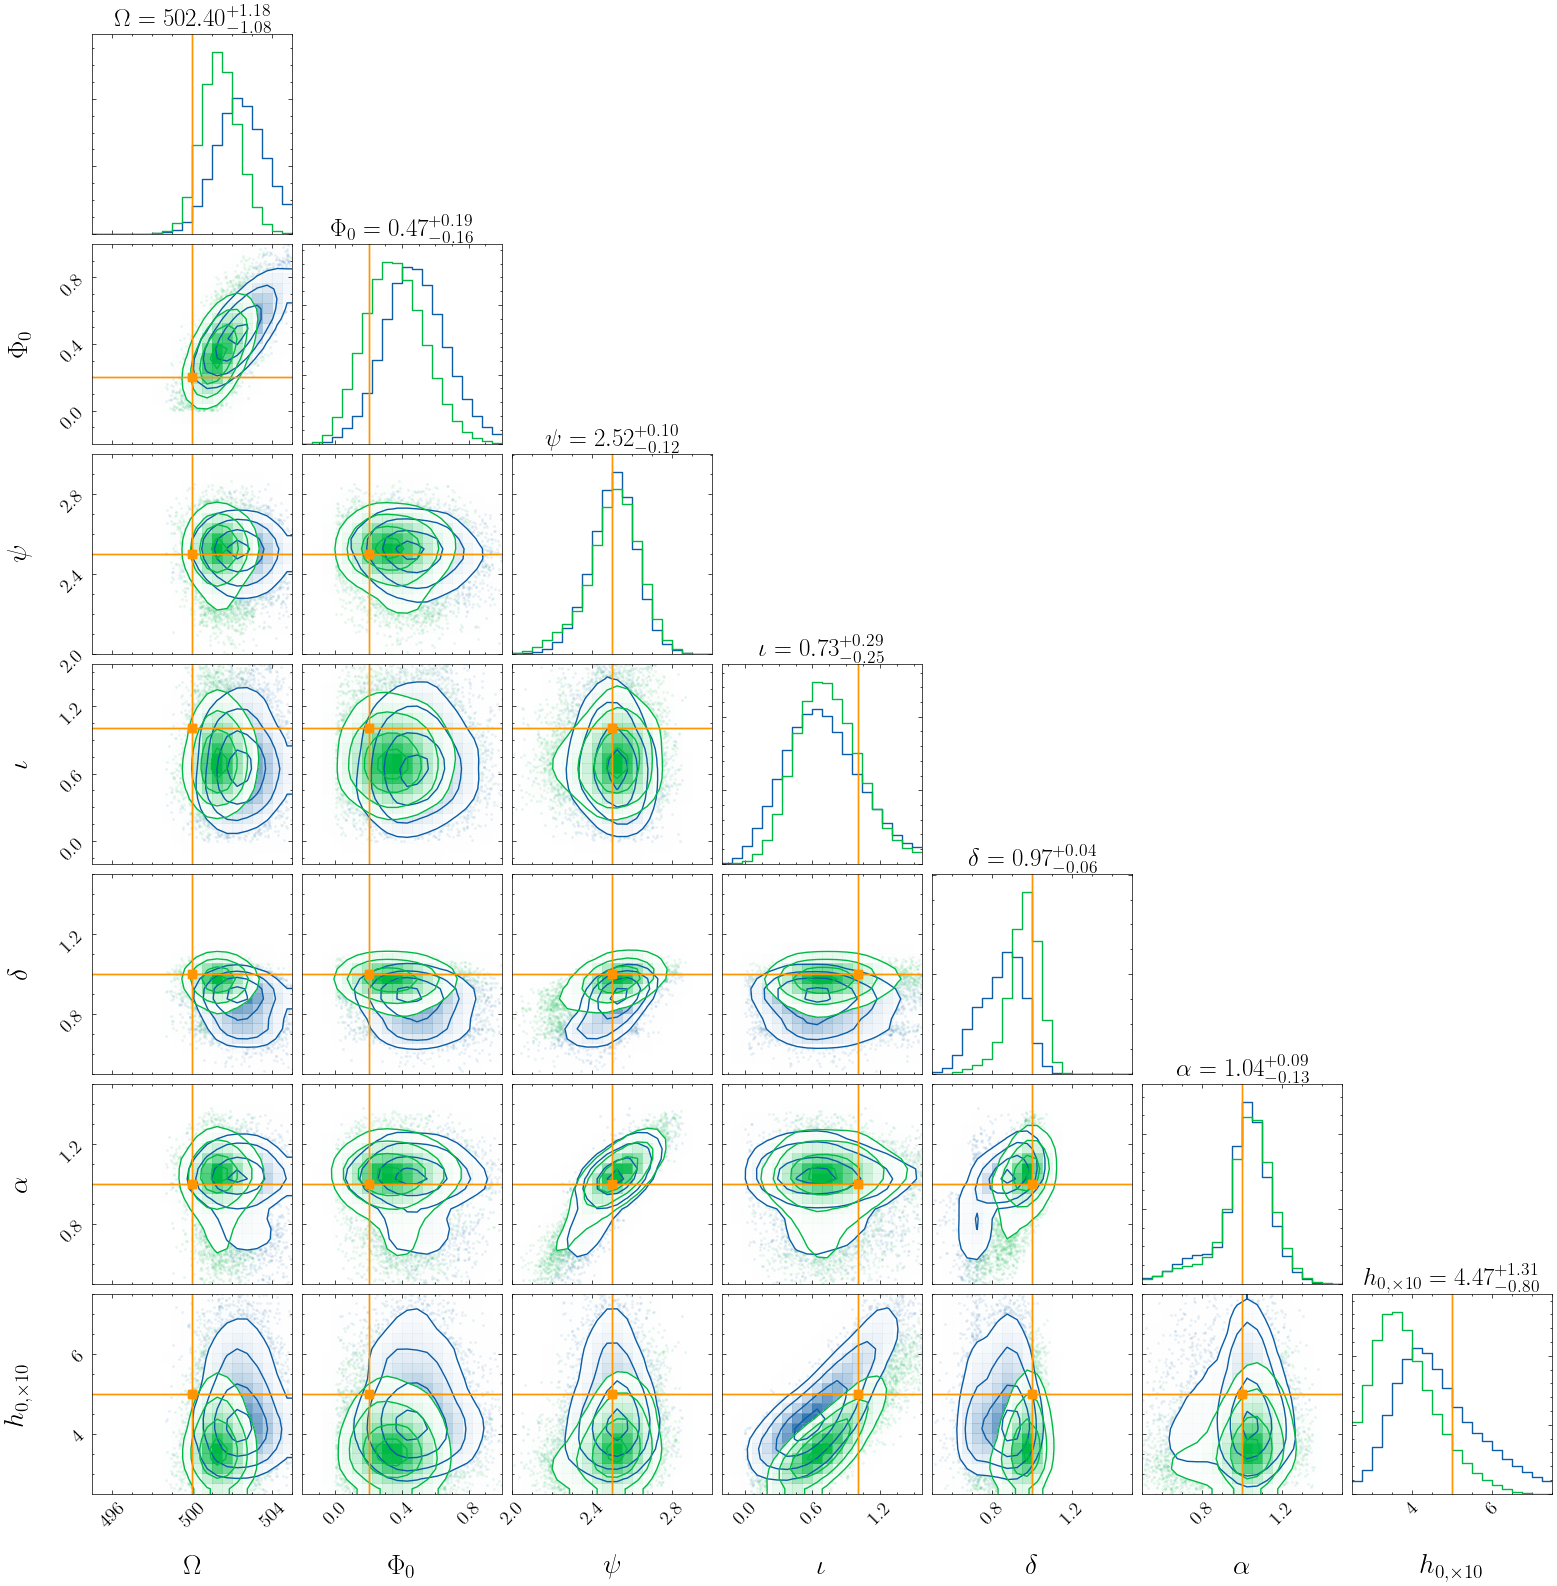

In [21]:

import glob 
from plotting import stacked_corner


#default values of GW parameters
ranges=[(4.95e-7,5.05e-7),(-0.2,1.0),(2.0,3.0),(-0.2,np.pi/2),(0.5,1.5),(0.5,1.5),(0.5*5e-15,1.5*5e-15)]
#ranges=[(4.95e-7,5.05e-7),(0.19,0.21),(2.30,2.70),(-0.2,np.pi/2),(0.5,1.5),(0.90,1.10),(0.5e-12,1.5e-12)]

#ranges = None
injection_parameters = [5e-7,0.20,2.50,1.0,1.0,1.0,5e-15]
labels = [r'$\Omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'$h_{0, \times 10}$']
variables_to_plot = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]
axes_scales = None
#ranges = None
#list_of_files = glob.glob('../data/clean/rsync_folder/*.json')

list_of_files = ['../data/clean/eg_canonical_earth_5e-15_1251_result.json','../data/clean/eg_canonical_pulsar_5e-15_1251_result.json']

number_of_files_to_plot = len(list_of_files)
#Corner plot of GW parameters
fig = stacked_corner(list_of_files,
                   number_of_files_to_plot,
                   variables_to_plot,
                   labels,
                   injection_parameters,
                   ranges,
                   axes_scales,
                   scalings = [1e9,1e15], #the scalings for omega and h
                   savefig='corner_lowSNR',
                   smooth=True,smooth1d=True)







# Bayes ratios plot

Earth terms: Minimal detectable strain for beta = 10.0 is: 3.4371166064378563e-15
Pulsar terms: Minimal detectable strain for beta = 10.0 is: 2.794667703911277e-15
The percentage improvement in the minimal detectable strain is 0.18691507332723217


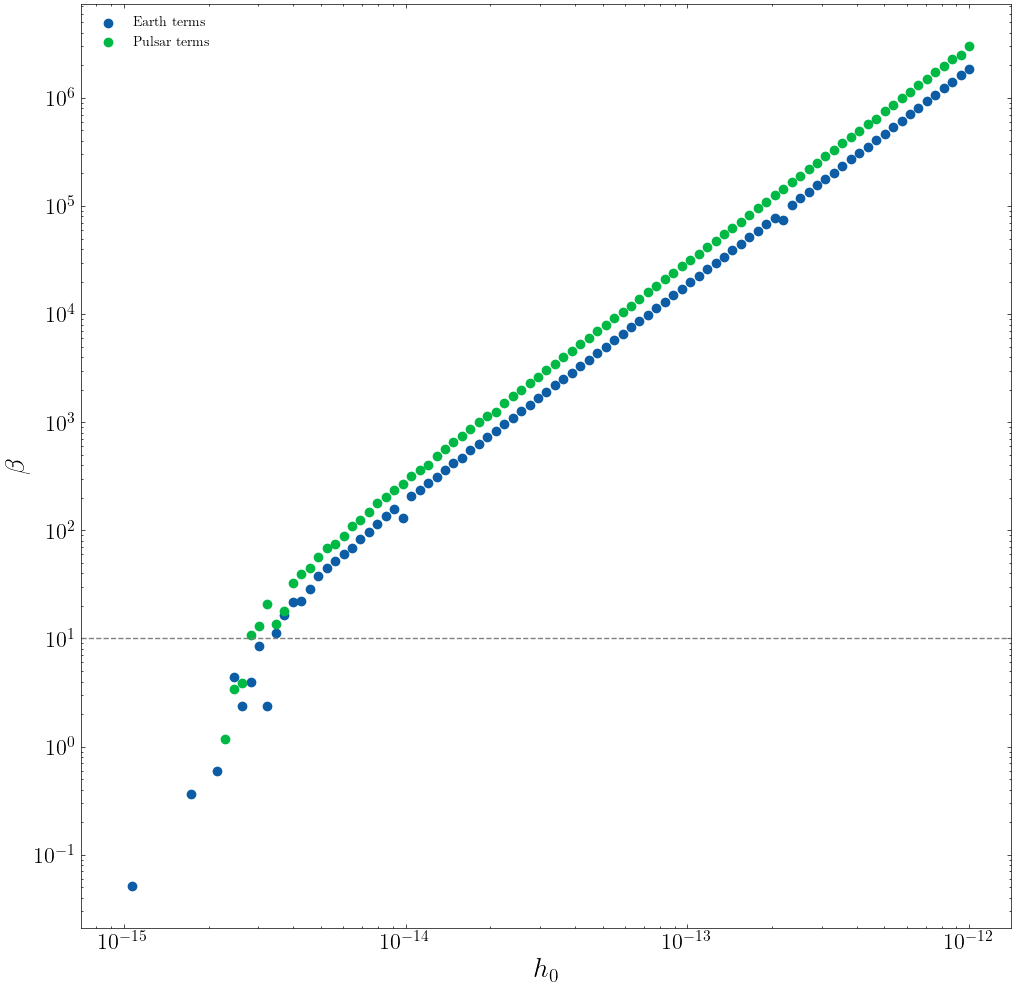

In [9]:
import matplotlib.pyplot as plt 
import scienceplots
import numpy as np 



f1 = '../data/clean/bayes_factors.npy'
plt.style.use('science')
h,w = 12,12
rows = 1
cols = 1
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w))


#load and plot
data = np.load(f1) 
x = data[:,0]
y1 = data[:,1]
y2 = data[:,2]



#sort in order of strain
p = x.argsort()
x = x[p]
y1 = y1[p]
y2 = y2[p]


ax.scatter(x,y1,label='Earth terms')
ax.scatter(x,y2,label='Pulsar terms')

#ax.plot(x,y)

ax.set_xscale('log')
ax.set_yscale('log')



fs=20
ax.set_xlabel(r'$h_0$', fontsize=fs)
ax.set_ylabel(r'$\beta$', fontsize=fs)

ax.xaxis.set_tick_params(labelsize=fs-4)
ax.yaxis.set_tick_params(labelsize=fs-4)

ax.axhline(10,linestyle='--', c='0.5')



savefig = 'CanonicalBayesPlot2000'
plt.savefig(f"../data/images/{savefig}.png", bbox_inches="tight",dpi=300)



#Min detectable strain
ynew = 10.0 
xnew_earth = np.interp(ynew, y1, x)
print(f"Earth terms: Minimal detectable strain for beta = {ynew} is: {xnew_earth}")



ynew = 10.0 
xnew_psr = np.interp(ynew, y2, x)
print(f"Pulsar terms: Minimal detectable strain for beta = {ynew} is: {xnew_psr}")


print(f"The percentage improvement in the minimal detectable strain is {np.abs(xnew_psr-xnew_earth)/xnew_earth}")

plt.legend()